In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.formula.api import ols

import repyrt as rpt

rpt.local_settings['DEBUG'] = True

In [2]:
print(rpt.get_sql('test_sql'))

get_sql ('test_sql',) {}
ending get_sql ; time: 2.86102294921875e-06
test


In [3]:
props = rpt.acquire_data()

starting acquire_data
wrangle_zillow () {'db': 'zillow', 'sql': 'zillow_sql', 'sql_string': False}
starting get_db_url
ending get_db_url ; time: 3.0994415283203125e-06
get_sql () {'sql': 'zillow_sql'}
ending get_sql ; time: 3.0994415283203125e-06
ending wrangle_zillow ; time: 24.863314151763916
ending acquire_data ; time: 24.864372968673706


In [4]:
rpt.frame_splain(props, 'props')

starting frame_splain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 62 columns):
bathroomcnt                     18639 non-null float64
bedroomcnt                      18639 non-null float64
calculatedfinishedsquarefeet    18639 non-null float64
taxvaluedollarcnt               18639 non-null float64
county                          18639 non-null object
tax_rate                        18639 non-null float64
id                              18639 non-null int64
parcelid                        18639 non-null int64
airconditioningtypeid           6547 non-null float64
airconditioningdesc             6547 non-null object
basementsqft                    12 non-null float64
buildingqualitytypeid           12842 non-null float64
calculatedbathnbr               18633 non-null float64
decktypeid                      140 non-null float64
finishedfloor1squarefeet        1485 non-null float64
finishedsquarefeet12            18589 non-null float64
fin

In [33]:
#props[['regionidcity','tax_rate']].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [5]:
prep_props = rpt.edit_gross_df(props)

starting edit_gross_df
starting rename_fields
ending rename_fields ; time: 0.059236764907836914
ending edit_gross_df ; time: 0.061020851135253906


In [6]:
rpt.frame_splain(prep_props, 'prep_props')

starting frame_splain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 62 columns):
nbr_bedrms                    18639 non-null float64
nbr_bthrms                    18639 non-null float64
finished_sqft                 18639 non-null float64
taxable_value                 18639 non-null float64
county                        18639 non-null object
tax_rate                      18639 non-null float64
id                            18639 non-null int64
pid                           18639 non-null int64
airconditioningtypeid         6547 non-null float64
airconditioningdesc           6547 non-null object
basementsqft                  12 non-null float64
buildingqualitytypeid         12842 non-null float64
calculatedbathnbr             18633 non-null float64
decktypeid                    140 non-null float64
finishedfloor1squarefeet      1485 non-null float64
finishedsquarefeet12          18589 non-null float64
finishedsquarefeet13          7 non

In [7]:
prepped = rpt.edit_prep_df(prep_props)

starting edit_prep_df
ending edit_prep_df ; time: 0.003763914108276367


In [8]:
rpt.frame_splain(prepped, 'prepped')

starting frame_splain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 4 columns):
nbr_bthrms       18639 non-null float64
nbr_bedrms       18639 non-null float64
finished_sqft    18639 non-null float64
taxable_value    18639 non-null float64
dtypes: float64(4)
memory usage: 582.5 KB
prepped shape:
 (18639, 4) 

prepped description:
          nbr_bthrms    nbr_bedrms  finished_sqft  taxable_value
count  18639.000000  18639.000000   18639.000000   1.863900e+04
mean       3.125168      2.329229    1831.181126   5.115606e+05
std        0.986794      0.970814     952.169130   6.698696e+05
min        1.000000      1.000000     242.000000   1.050400e+04
25%        2.000000      2.000000    1214.000000   2.071050e+05
50%        3.000000      2.000000    1582.000000   3.685350e+05
75%        4.000000      3.000000    2179.000000   6.044115e+05
max       11.000000     11.000000   15450.000000   2.385837e+07 

prepped info:
 None 

ending frame_spla

In [9]:
# props.shape

In [10]:
# props.index.value_counts().head(10)

In [11]:
context = rpt.set_context(target_df=prepped, scaler_fn=rpt.standard_scaler)
type(context)

starting set_context
starting split_my_data
ending split_my_data ; time: 0.003509044647216797
starting standard_scaler
starting scalem
ending scalem ; time: 0.011317014694213867
ending standard_scaler ; time: 0.01623702049255371
starting xy_df
ending xy_df ; time: 0.002794981002807617
starting xy_df
ending xy_df ; time: 0.0013439655303955078
starting xy_df
ending xy_df ; time: 0.0022318363189697266
starting xy_df
ending xy_df ; time: 0.0019881725311279297
ending set_context ; time: 0.08686995506286621


split_scale.Context

In [14]:
X_train = context.X_train
print(X_train.shape)
y_train = context.y_train
print(y_train.shape)
train = X_train.join(y_train)
print(train.shape)

print(train.taxable_value.value_counts().idxmax())


(13979, 4)
(13979, 1)
(13979, 5)
450000.0


starting pairplot_train


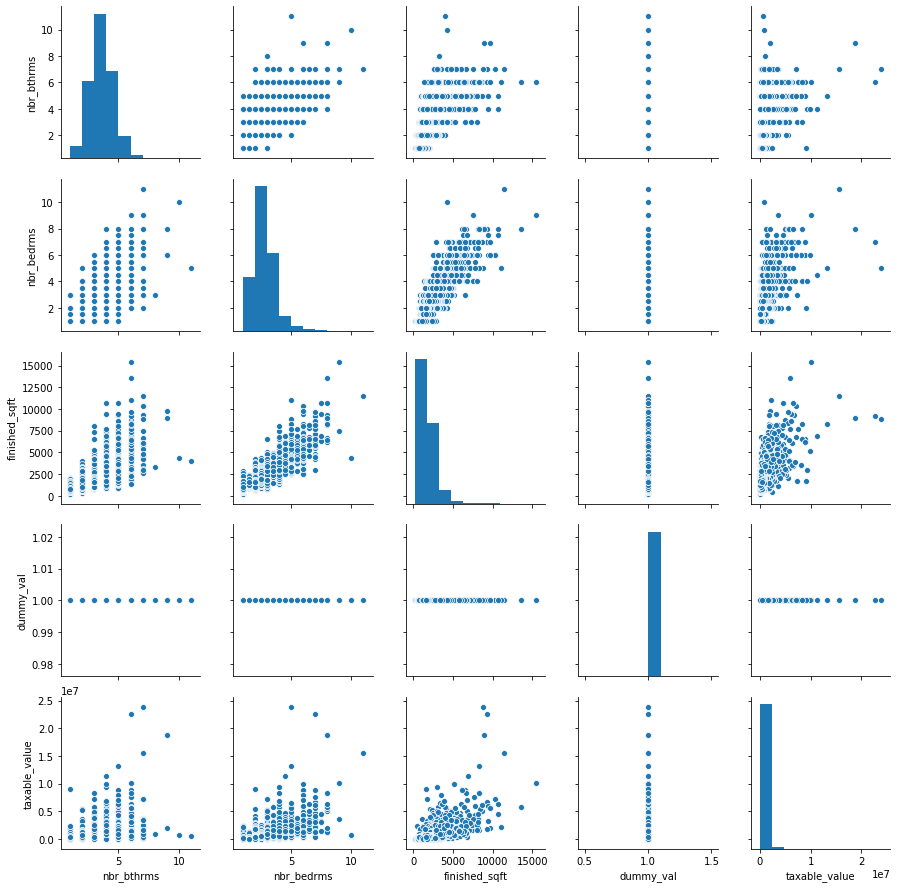

ending pairplot_train ; time: 8.964550256729126


In [15]:
rpt.pairplot_train(train)

starting heatmap_train


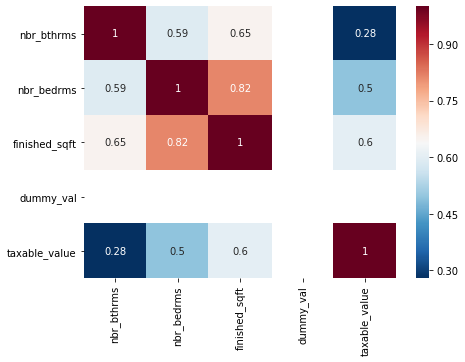

ending heatmap_train ; time: 0.3201611042022705


In [16]:
rpt.heatmap_train(train)

In [17]:

#train = rpt.df_join_xy(X=X_train, y=y_train)
#OLS object to analyze features

# ols_model = sm.OLS(y_train,X_train)
# fit = ols_model.fit()
# fit.summary()

ols_model = ols('y_train ~ X_train',data=train).fit()
train['yhat'] = ols_model.predict(y_train)

In [18]:

#r2 of 
r2_lm1 = r2_score(y_train,train.yhat)
r2_lm1

0.38962818533644716

In [29]:
#creating baseline with mean of tax value
train['tax_mean'] = train.taxable_value.mean()
train.head()

,nbr_bthrms,nbr_bedrms,finished_sqft,dummy_val,taxable_value,yhat,residual,residual2,tax_mean
18321,3.0,2.0,2163.0,1,106818.0,6.816894e+05,5.748714e+05,3.304772e+11,509852.115745
8440,6.0,8.0,8706.0,1,4984456.0,3.708474e+06,-1.275982e+06,1.628130e+12,509852.115745
8197,3.0,2.0,1773.0,1,72886.0,4.872435e+05,4.143575e+05,1.716922e+11,509852.115745
6622,4.0,2.0,2150.0,1,2080471.0,5.329566e+05,-1.547514e+06,2.394801e+12,509852.115745
6849,1.0,1.0,975.0,1,314727.0,3.419908e+05,2.726381e+04,7.433151e+08,509852.115745


In [21]:
#creating residual of tax value vs expected tax value
train['residual'] = train['yhat'] - train['taxable_value']
train['residual2'] = train.residual **2
train.head()

,nbr_bthrms,nbr_bedrms,finished_sqft,dummy_val,taxable_value,yhat,residual,residual2
18321,3.0,2.0,2163.0,1,106818.0,6.816894e+05,5.748714e+05,3.304772e+11
8440,6.0,8.0,8706.0,1,4984456.0,3.708474e+06,-1.275982e+06,1.628130e+12
8197,3.0,2.0,1773.0,1,72886.0,4.872435e+05,4.143575e+05,1.716922e+11
6622,4.0,2.0,2150.0,1,2080471.0,5.329566e+05,-1.547514e+06,2.394801e+12
6849,1.0,1.0,975.0,1,314727.0,3.419908e+05,2.726381e+04,7.433151e+08


## MVP

In [22]:

from sklearn.linear_model import LinearRegression
#pick model type, Linear Regression for the MVP baseline
lm1 = LinearRegression()

In [23]:
#fit and train model
lm1.fit(X_train,y_train)
lm1_y_intercept = lm1.intercept_
lm1_coefficients = lm1.coef_

print('{} = b + m1 * {} + m2 * {}'.format(y_train.columns[0], X_train.columns[0],X_train.columns[1]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])

taxable_value = b + m1 * nbr_bthrms + m2 * nbr_bedrms
    y-intercept  (b): -33761.74
    coefficient (m1): -142251.30
    coefficient (m2): 31889.08


In [26]:

#converting y_train to panda series
y_train = y_train.taxable_value

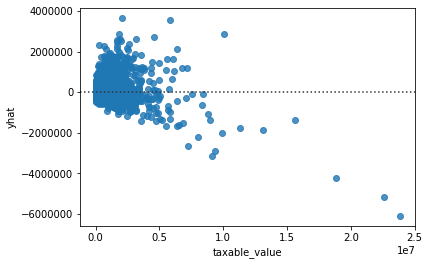

In [27]:
#Plotting residuals
sns.residplot(y_train,train.yhat)

In [28]:
#MSE, SSE, RMSE
import math
sse = sum(train.residual2)
mse = sse/len(train)
rmse = math.sqrt(mse)
r2 = ols_model.rsquared
print(sse,mse,rmse,r2)

4000116101697015.5 286151806402.2473 534931.5903947413 0.3896281853364473
